In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# Load data
data = pd.read_csv('../data/time_series_data.csv')



In [15]:
invalid_dates = data[~data['Date'].str.match(r'^\d{4}-\d{2}-\d{2}$', na=False)]
print(invalid_dates)

    Company_Name   Sector             Date  EPS  P_E  Dividend_Yield
78          được      NaN              NaN  NaN  NaN             NaN
311       TradeI  Trading  2023-10-01  doj  NaN  NaN             NaN


In [16]:

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Convert invalid dates to NaT
data = data.dropna(subset=['Date'])

In [17]:
data['Date'] = pd.to_datetime(data['Date'])

In [18]:
for metric in ['EPS', 'P_E', 'Dividend_Yield']:
    data[metric] = pd.to_numeric(data[metric], errors='coerce')  # Convert invalid values to NaN
data = data.dropna(subset=['EPS', 'P_E', 'Dividend_Yield'])  # Drop rows with NaN in these columns
data.to_csv("../data/time_series_data_cleaned.csv", index=False)  # Save the cleaned data

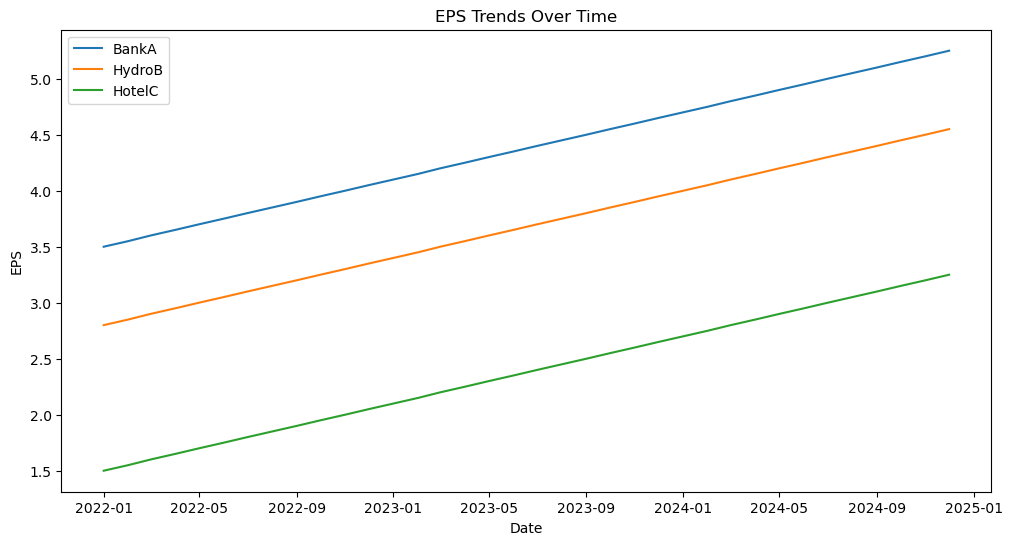

In [19]:
# Plot EPS trends for a few companies
plt.figure(figsize=(12, 6))
for company in data['Company_Name'].unique()[:3]:
    company_data = data[data['Company_Name'] == company]
    plt.plot(company_data['Date'], company_data['EPS'], label=company)
plt.title('EPS Trends Over Time')
plt.xlabel('Date')
plt.ylabel('EPS')
plt.legend()
plt.savefig('eps_trends.png')

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


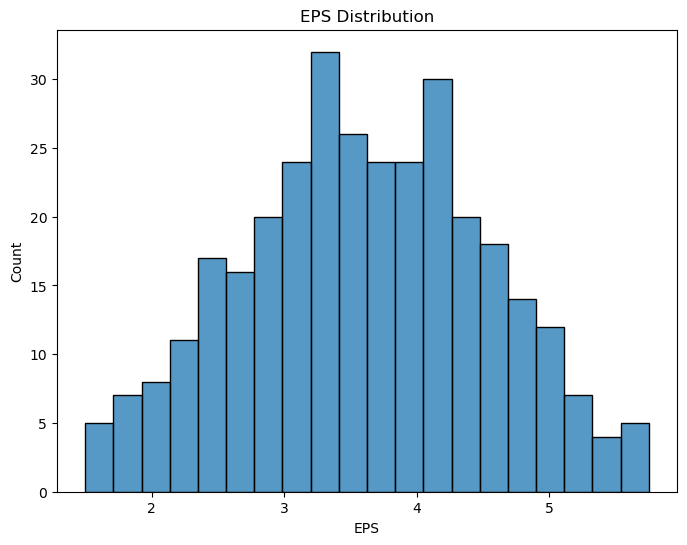

In [20]:
# Distribution of EPS
plt.figure(figsize=(8, 6))
sns.histplot(data['EPS'], bins=20)
plt.title('EPS Distribution')
plt.savefig('eps_distribution.png')

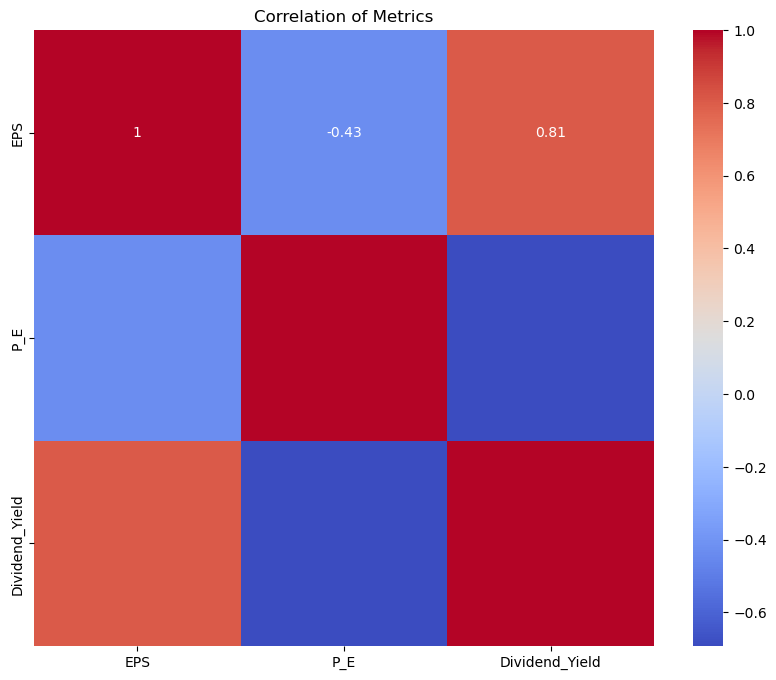

In [21]:
# Correlation between metrics
plt.figure(figsize=(10, 8))
sns.heatmap(data[['EPS', 'P_E', 'Dividend_Yield']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of Metrics')
plt.savefig('correlation_metrics.png')

In [23]:
df = pd.read_csv("../data/predicted_metrics.csv")
df

,Company_Name,Period,EPS,P_E,Dividend_Yield
0,BankA,1,8.477388,6.520729,6.851618
1,BankA,2,8.583029,6.586511,6.930306
2,BankA,3,8.719143,6.674091,7.028776
3,BankA,4,8.881505,6.779778,7.143706
4,BankA,5,9.065641,6.900558,7.272134
5,BankA,6,9.267377,7.033939,7.411647
6,BondF,1,7.177339,4.053843,9.545574
7,BondF,2,7.255778,4.077185,9.693922
8,BondF,3,7.349209,4.102493,9.898578
9,BondF,4,7.454299,4.129391,10.146023


In [30]:
df["Company_Name"].unique()

array(['BankA', 'BondF', 'DebentureD', 'FinanceE', 'HotelC', 'HydroB',
       'InvestG', 'LifeH', 'TradeI'], dtype=object)